In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')


file = 'Data/Minimos.dat'


#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)

sigma = np.random.normal(loc=0,scale=20,size=N)
sigma = np.abs(sigma)

<ErrorbarContainer object of 3 artists>

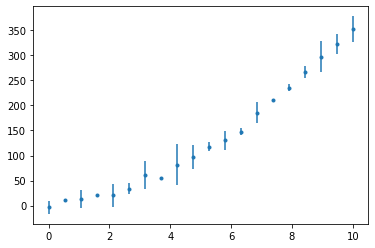

In [4]:
plt.errorbar(x,y,yerr=sigma,fmt='.')

In [5]:
# MOdelo
def GetModel(x,p):
    
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
    
    #y = p[0]*np.exp(p[1]*x)
        
    return y

In [11]:
def Chi2(p,xi,yi,sigma):
    return np.sum (  (yi-GetModel(xi,p))**2/(2*sigma**2) )

In [21]:
p0 = np.ones(3)
p0

array([1., 1., 1.])

In [22]:
nll = lambda *p: Chi2(*p)

In [23]:
result = spo.minimize( nll, p0, args=(x,y,sigma),options={'disp':True} )

Optimization terminated successfully.
         Current function value: 7.682656
         Iterations: 12
         Function evaluations: 56
         Gradient evaluations: 14


In [24]:
bestparam = result.x
bestparam

array([15.83711229, -3.83810383,  4.05019918])

In [25]:
len(x),len(y),len(sigma)

(20, 20, 20)